In [1]:
123*4

492


# Summary

<p>
This is a use case for Plotly Dash.<br>
It creates a sales dashboard for world wide e-commerce data.<br>
According to Wordnik a dashboard is <br>
"a user interface on a computer display that presents constantly updated information, such as processing speed, in a format that resembles the dashboard of a vehicle."<br>
This sales dashboard is intuitively understandable.    
<p>

<p>
On a technical level this project applies Plotly and JupyterDash for data visualization and web deployment.<br>
It is also applying HTML and CSS to structure and style the dashboard.
</p>

<p>
This notebook is part of larger project consisting of a portfolio of notebooks testing out different versions of the sales dashboard.<br>
In this notebook a simple core app is created.<br>
It creates single Dash plots. On the first look those are hard to distinguish from Plotly plots.<br>
There is also a dedicated notebook for importing and cleaning the data.<br>
The cleaned data can immediately used in the JupyterDash notebooks.<br>
It is followed up by another project adding interactivity to the sales dashboard.<br>
Then users can get particular information by sliding or klicking on graphic elements.<br>
</p>

<p>
Dash made a great job bringing Dash to Jupyter.<br>
Normally you would develop and start Dash from an IDE and the command line.<br>
As this project is a demonstration of Dash capabilities JupyterDash was chosen.<br>
The Dash app is here displayed inside the notebook, but there are other notebook versions, which starts the app with link at the end of the output into a website.<br>
One last word: <b>Dash needs Javascript to be installed on the machine to work.</b>
</p>

<hr width=”300″, size=5> 

# Importing packages

In [2]:
# Base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import os

### Plotly

In [3]:
import ipywidgets

In [4]:

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# plotly.offline.init_notebook_mode(connected=True)

# plotly
import plotly
import plotly.express as px
# plotly.tools.set_credentials_file(username = 'lathkar', api_key = '************')


# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import plotly.io as pio

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
import plotly.offline as pyo
#pyo.init_notebook_mode()

#import plotly.io as pio
print(pio.renderers)

pio.renderers.default = 'jupyterlab'


plotly.offline.init_notebook_mode(connected=True)

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



#### Node.js
<p>
Do not forget to install node.js on your machine and in the env.<br>
Otherwise inline plotly plots will not render.<br>
https://jupyterlab.readthedocs.io/en/stable/user/extensions.html#using-the-extension-manager
</p>

### Testing Plotly within JupyterLab
<p>Plotly works!</p>


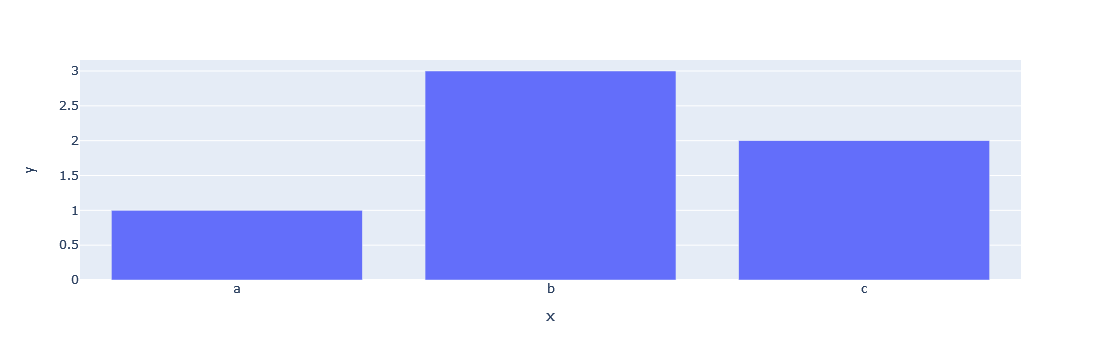

In [5]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

#### Checking current working directory

In [6]:
# print(os.getcwd())

<hr width=”300″, size=5> 

## Dash

In [7]:
import dash
import dash_core_components as dcc
import dash_html_components as html


from dash.dependencies import Input, Output


# from dash import dcc
# import dash_core_components as dcc - depreciated
# from dash import html
# import dash_html_components as html - depreciated

## Jupyter Dash

<p>
<b>"Introducing JupyterDash</b>

"We’re excited to announce the release of JupyterDash, our new library that makes it easy to build Dash apps from Jupyter environments (e.g. classic Notebook, JupyterLab, Visual Studio Code notebooks, nteract, PyCharm notebooks, etc.)."<br>
<a href="https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e" target="_blank">Medium</a>
</p>



In [8]:
from jupyter_dash import JupyterDash

#### Testing JupyterDash

In [9]:
# Load Data
df = px.data.tips()# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )# Run app and display result inline in the notebook
app.run_server(mode='inline', port=8047)

#### Checking current working directory

In [10]:
# %%cmd
# cd

cwd=os.getcwd()
# print(cwd)

In [11]:
#### Checking versions

!python --version
!conda --version

print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Seaborn {}".format(sns.__version__))
print("Plotly {}".format(plotly.__version__))
print("Dash {}".format(dash.__version__))

Python 3.10.0
conda 4.12.0
Pandas: 1.4.1
Numpy: 1.21.5
Seaborn 0.11.2
Plotly 5.6.0
Dash 1.19.0


### Creating an requirements file

In [12]:
%%capture
%%cmd 
mkdir txt

In [13]:
!conda list > txt/requirements_dash_dashboards_coreApp.txt
!jupyter --version > txt/jupyter_version_coreApp.txt

# Importing the data

In [14]:
revenue_topten = \
pd.read_csv("csv/cleaned_df/revenue_topten.csv")

In [15]:
revenue_topten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_month  111 non-null    object 
 1   Country     111 non-null    object 
 2   revenue     111 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [16]:
revenue_topten.head()

,year_month,Country,revenue
0,2010-12-01,Cyprus,198.68
1,2010-12-01,EIRE,1973.13
2,2010-12-01,France,1557.36
3,2010-12-01,Germany,2181.67
4,2010-12-01,Italy,215.50


In [17]:
total_sales_gb_month =\
pd.read_csv("csv/cleaned_df/total_sales_gb_month.csv")

total_sales_gb_month.head()

,Year-Month,Total_Sales ($)
0,2011-11-01,2553.74
1,2011-05-01,2394.34
2,2011-09-01,2339.75
3,2011-08-01,2327.19
4,2011-03-01,2324.19


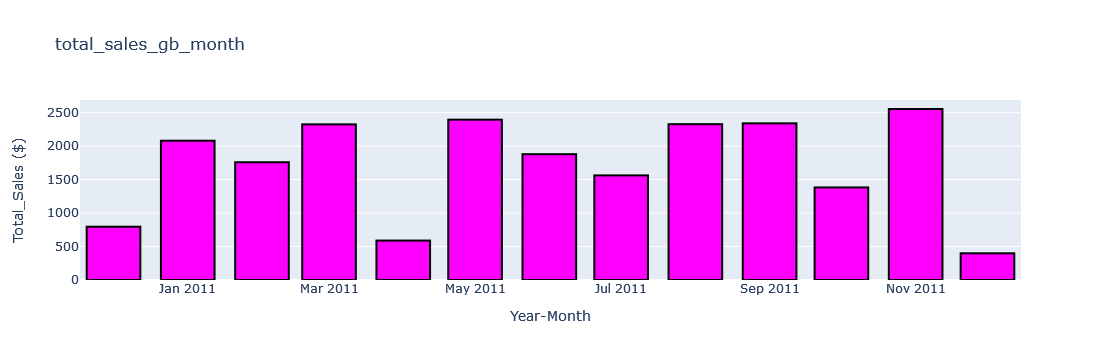

In [18]:
fig_sales_gb_month = \
px.bar(data_frame=total_sales_gb_month, x='Year-Month', y='Total_Sales ($)',
       color_discrete_sequence=["magenta"],
       title='total_sales_gb_month')
fig_sales_gb_month.update_traces(marker_line_width=2, marker_line_color='black')
fig_sales_gb_month.show()

## Building JupyterDash apps

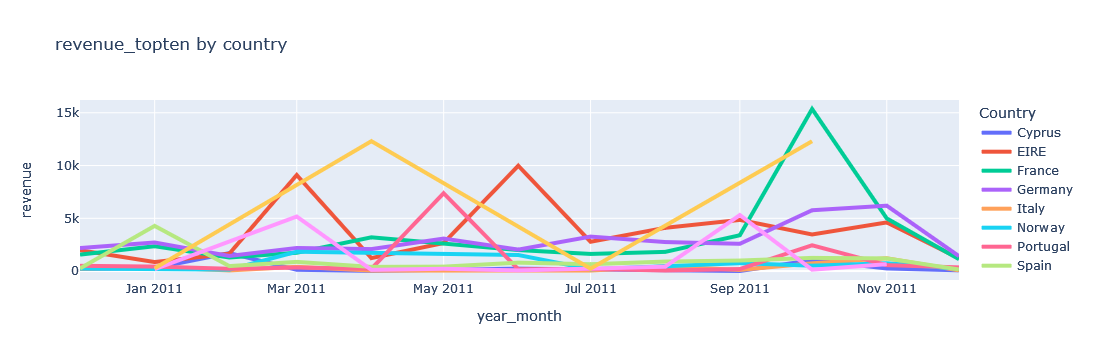

In [19]:
top_ten_revenue_fig = \
px.line(data_frame=revenue_topten, x='year_month', y='revenue', color='Country', 
        title="revenue_topten by country")
top_ten_revenue_fig.update_traces(line_width=4)
       
top_ten_revenue_fig.show()

In [20]:
# %%capture output

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Warning suppressed with capture:
# The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.


app = JupyterDash(__name__)

app.layout = \
dcc.Graph(id='revenue_app',figure = top_ten_revenue_fig)

#if name == __main__:
app.run_server(mode='inline', debug =True, port=8045)

### Quick sales dashboard

In [21]:
app_quick_dashboard = JupyterDash(__name__)

app_quick_dashboard.layout = \
html.Div(children=[
html.H1('Total sales numbers'),
html.Div(dcc.Graph(id='top_ten_revenue', figure = top_ten_revenue_fig)),
html.Div(dcc.Graph(id='fig_sales_gb_month', figure = fig_sales_gb_month))

])

# if __name__ == '__main__':
    # app_quick_dashboard.run_server(debug=True)
    
app_quick_dashboard.run_server(mode='inline', debug =True, port=8061)